<a href="https://colab.research.google.com/github/ShashankS1ngh/GSDT/blob/main/Retail_Competition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install Chrome and dependencies
!apt-get update
!apt-get install -y wget unzip
!wget -q https://dl.google.com/linux/direct/google-chrome-stable_current_amd64.deb
!dpkg -i google-chrome-stable_current_amd64.deb
!apt-get -f install -y

# Install Selenium and other packages
!pip install selenium
!pip install webdriver-manager
!pip install textblob


Get:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,626 B]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease [1,581 B]
Get:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Ign:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Get:6 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Get:7 https://r2u.stat.illinois.edu/ubuntu jammy Release [5,713 B]
Get:8 https://r2u.stat.illinois.edu/ubuntu jammy Release.gpg [793 B]
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Get:10 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  Packages [861 kB]
Hit:11 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Get:12 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease [24.3 kB]
Get:13 https://r2u.stat.illinois.edu/ubuntu jammy/main all Packages [8,217 kB]


In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time

# Set up Chrome options for headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Install ChromeDriver and set up the service
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Navigate to the TripAdvisor review page
url = 'https://www.mouthshut.com/product-reviews/big-bazaar-reviews-926009677'
driver.get(url)

# Allow time for the page to load
time.sleep(5)

# Initialize a list to store reviews
all_reviews = []

while True:
    # Extract review elements using the CSS selector
    review_elements = driver.find_elements(By.CSS_SELECTOR, 'strong > a')
    reviews = [element.text for element in review_elements]
    all_reviews.extend(reviews)

    # Print the reviews for debugging
    print(f"Reviews on this page: {reviews}")

    # Find and click the "Next" button to go to the next page
    # Find and click the "Next" button to go to the next page
    try:
        next_button = driver.find_element(By.CSS_SELECTOR, 'a.BrOJk.u.jz_F.WSSLS.tIqAi.unMkR')
        driver.execute_script("arguments[0].click();", next_button)
        time.sleep(5)  # Allow time for the next page to load
    except Exception as e:
        print("No more pages or an error occurred:", e)
        break


# Close the driver
driver.quit()

# Print the number of reviews collected
print(f"Number of reviews collected: {len(all_reviews)}")

# Optionally, print the first few reviews
print(all_reviews[:10])


Reviews on this page: ['Everything under one roof', 'Not what we want', 'Bigbazar', 'Not purchased', 'Big Bazaar: Big Cheaters', 'Profit Club Card and Gift Vouchers', 'Big and good Bazar', 'Product king', 'Big bazaar', 'I want to share experience', 'Good experience of shopping here', 'All at one place', 'Big bazaar', 'Cheat Bazaar', 'Shopping experience', 'Best for home grocery items.', 'Big bazaar', 'Worst', 'Big Bazaar', 'ONE TIME GO']
No more pages or an error occurred: Message: no such element: Unable to locate element: {"method":"css selector","selector":"a.BrOJk.u.jz_F.WSSLS.tIqAi.unMkR"}
  (Session info: chrome-headless-shell=127.0.6533.88); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
#0 0x59d10ce3171a <unknown>
#1 0x59d10cb02640 <unknown>
#2 0x59d10cb51c0b <unknown>
#3 0x59d10cb51ef1 <unknown>
#4 0x59d10cb95b64 <unknown>
#5 0x59d10cb7490d <unknown>
#6 0x59d10cb9308a 

In [ ]:
from textblob import TextBlob
import pandas as pd

# Create a DataFrame to store reviews and sentiment scores
df = pd.DataFrame(all_reviews, columns=['Review'])

# Function to analyze sentiment
def analyze_sentiment(all_reviews):
    analysis = TextBlob(all_reviews)
    return analysis.sentiment.polarity

# Apply sentiment analysis
df['Sentiment'] = df['Review'].apply(analyze_sentiment)

# Display the DataFrame
print(df.head(20))


                                Review  Sentiment
0            Everything under one roof       0.00
1                     Not what we want       0.00
2                             Bigbazar       0.00
3                        Not purchased       0.00
4             Big Bazaar: Big Cheaters       0.00
5   Profit Club Card and Gift Vouchers       0.00
6                   Big and good Bazar       0.35
7                         Product king       0.00
8                           Big bazaar       0.00
9           I want to share experience       0.00
10    Good experience of shopping here       0.70
11                    All at one place       0.00
12                          Big bazaar       0.00
13                        Cheat Bazaar       0.00
14                 Shopping experience       0.00
15        Best for home grocery items.       1.00
16                          Big bazaar       0.00
17                               Worst      -1.00
18                          Big Bazaar       0.00


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


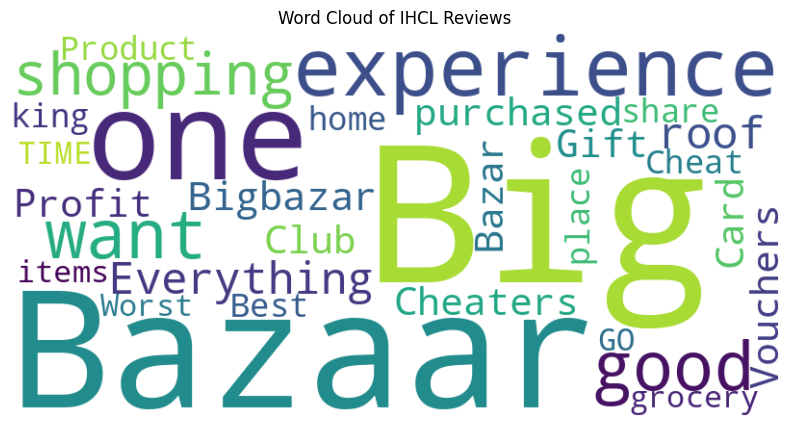

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Combine all reviews into a single string
text = ' '.join(review for review in df['Review'])

# Optional: Remove stopwords
text = ' '.join(word for word in text.split() if word.lower() not in stop_words)
# Generate the word cloud
!pip install wordcloud

# Import libraries
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of BigBazaar Reviews')
plt.show()


In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time

# Set up Chrome options for headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Install ChromeDriver and set up the service
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Navigate to the TripAdvisor review page
url = 'https://www.desidime.com/stores/bigbazaar/reviews'
driver.get(url)

# Allow time for the page to load
time.sleep(5)

# Initialize a list to store reviews
all_reviews = []

while True:
    # Extract review elements using the CSS selector
    review_elements = driver.find_elements(By.CSS_SELECTOR, 'a.h1.bold')
    reviews = [element.text for element in review_elements]
    all_reviews.extend(reviews)

    # Print the reviews for debugging
    print(f"Reviews on this page: {reviews}")

    # Find and click the "Next" button to go to the next page
    # Find and click the "Next" button to go to the next page
    try:
        next_button = driver.find_element(By.CSS_SELECTOR, 'a.BrOJk.u.jz_F.WSSLS.tIqAi.unMkR')
        driver.execute_script("arguments[0].click();", next_button)
        time.sleep(5)  # Allow time for the next page to load
    except Exception as e:
        print("No more pages or an error occurred:", e)
        break


# Close the driver
driver.quit()

# Print the number of reviews collected
print(f"Number of reviews collected: {len(all_reviews)}")

# Optionally, print the first few reviews
print(all_reviews[:10])


Reviews on this page: ['Bad delivery package', 'Not purchase from big bazar online i...', 'Cheating by alphaone bigbazar', 'customer service now s very bad, ord...', 'GOOD EXPERIENCE', 'Must buy with future pay offer', 'Nice Help']
No more pages or an error occurred: Message: no such element: Unable to locate element: {"method":"css selector","selector":"a.BrOJk.u.jz_F.WSSLS.tIqAi.unMkR"}
  (Session info: chrome-headless-shell=127.0.6533.88); For documentation on this error, please visit: https://www.selenium.dev/documentation/webdriver/troubleshooting/errors#no-such-element-exception
Stacktrace:
#0 0x566b177d871a <unknown>
#1 0x566b174a9640 <unknown>
#2 0x566b174f8c0b <unknown>
#3 0x566b174f8ef1 <unknown>
#4 0x566b1753cb64 <unknown>
#5 0x566b1751b90d <unknown>
#6 0x566b1753a08a <unknown>
#7 0x566b1751b683 <unknown>
#8 0x566b174ebd71 <unknown>
#9 0x566b174ec7de <unknown>
#10 0x566b177a02ab <unknown>
#11 0x566b177a4242 <unknown>
#12 0x566b1778d665 <unknown>
#13 0x566b177a4dd2 <unknown>


In [ ]:
from textblob import TextBlob
import pandas as pd

# Create a DataFrame to store reviews and sentiment scores
df2 = pd.DataFrame(all_reviews, columns=['Review'])

# Function to analyze sentiment
def analyze_sentiment(all_reviews):
    analysis = TextBlob(all_reviews)
    return analysis.sentiment.polarity

# Apply sentiment analysis
df2['Sentiment'] = df2['Review'].apply(analyze_sentiment)

# Display the DataFrame
print(df2.head())


                                    Review  Sentiment
0                     Bad delivery package      -0.70
1  Not purchase from big bazar online i...       0.00
2            Cheating by alphaone bigbazar       0.00
3  customer service now s very bad, ord...      -0.91
4                          GOOD EXPERIENCE       0.70


In [ ]:
import pandas as pd

# Assuming df and df1 have the same columns
combined_df = pd.concat([df, df2], ignore_index=True)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


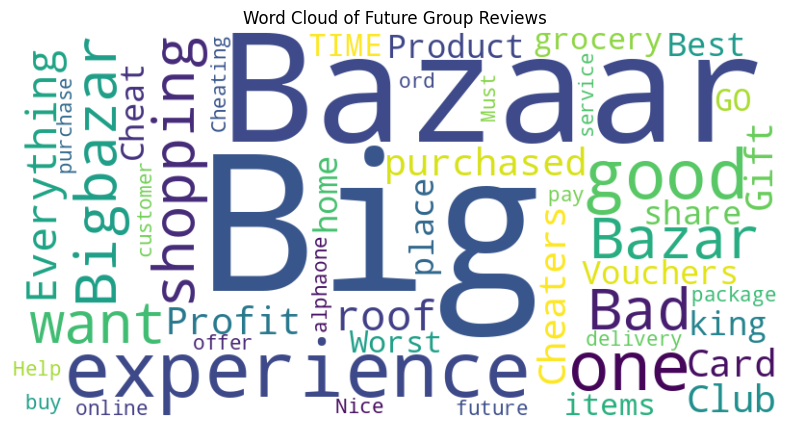

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Combine all reviews into a single string
text = ' '.join(review for review in combined_df['Review'])

# Optional: Remove stopwords
text = ' '.join(word for word in text.split() if word.lower() not in stop_words)
# Generate the word cloud
!pip install wordcloud

# Import libraries
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Future Group Reviews')
plt.show()


In [ ]:
positive_reviews = combined_df[combined_df['Sentiment'] > 0]
neutral_reviews = combined_df[combined_df['Sentiment'] == 0]
negative_reviews = combined_df[combined_df['Sentiment'] < 0]

# Combine reviews for each category into a single string
positive_text = ' '.join(review for review in positive_reviews['Review'])
neutral_text = ' '.join(review for review in neutral_reviews['Review'])
negative_text = ' '.join(review for review in negative_reviews['Review'])

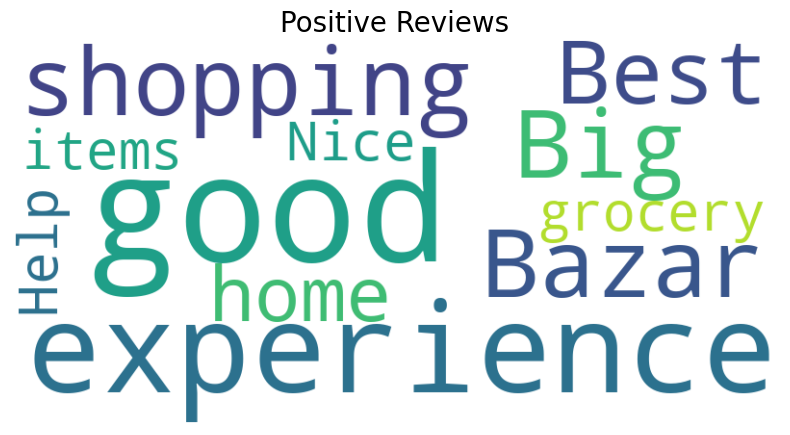

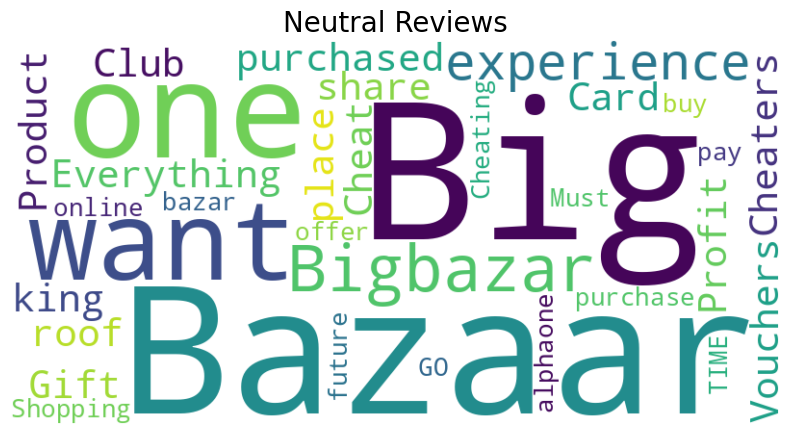

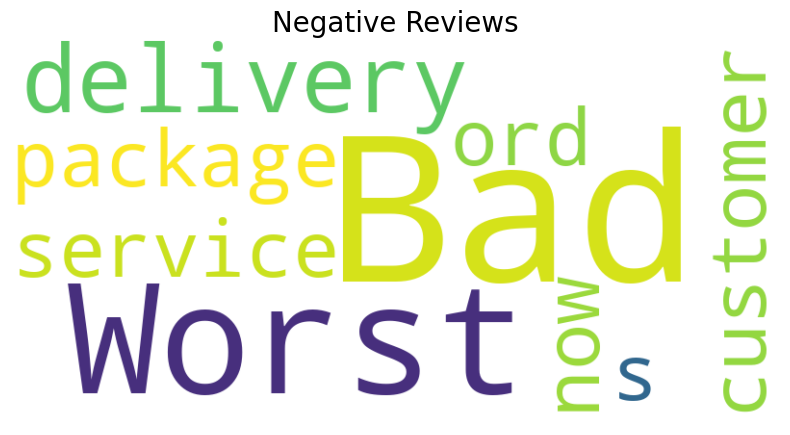

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create a word cloud
def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, size=20)
    plt.show()

# Generate word cloud for positive reviews
create_word_cloud(positive_text, 'Positive Reviews')

# Generate word cloud for neutral reviews
create_word_cloud(neutral_text, 'Neutral Reviews')

# Generate word cloud for negative reviews
create_word_cloud(negative_text, 'Negative Reviews')


In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time

# Set up Chrome options for headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Install ChromeDriver and set up the service
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Navigate to the Amazon review page
url = 'https://www.mouthshut.com/product-reviews/pantaloons-reviews-925012039'  # Replace with the actual product review URL
driver.get(url)

# Allow time for the page to load
time.sleep(5)

# Initialize a list to store reviews
all_reviews3 = []

while True:
    # Extract review elements using the CSS selector
    review_elements = driver.find_elements(By.CSS_SELECTOR, 'strong a')
    reviews3 = [element.text for element in review_elements]
    all_reviews3.extend(reviews3)

    # Find and click the "Next" button to go to the next page
    try:
        next_button = driver.find_element(By.CSS_SELECTOR, 'li.next > a.btn.btn-link')
        driver.execute_script("arguments[0].click();", next_button)
        time.sleep(5)  # Allow time for the next page to load
    except:
        print("No more pages or an error occurred.")
        break

# Close the driver
driver.quit()

# Print the number of reviews collected
print(f"Number of reviews collected: {len(all_reviews3)}")

# Optionally, print the first few reviews
print(all_reviews3[:5])


No more pages or an error occurred.
Number of reviews collected: 310
['In low budget feels like branded clothes malls', 'Worst customer care', 'Fraud store', 'FRAUD STORE AND FAKE PRODUCTS', 'Fake firm pantaloons']


In [ ]:
from textblob import TextBlob
import pandas as pd

# Create a DataFrame to store reviews and sentiment scores
df3 = pd.DataFrame(all_reviews3, columns=['Review'])

# Function to analyze sentiment
def analyze_sentiment(all_reviews):
    analysis = TextBlob(all_reviews)
    return analysis.sentiment.polarity

# Apply sentiment analysis
df3['Sentiment'] = df3['Review'].apply(analyze_sentiment)

# Display the DataFrame
print(df3.head(20))


                                               Review  Sentiment
0      In low budget feels like branded clothes malls       0.00
1                                 Worst customer care      -1.00
2                                         Fraud store       0.00
3                       FRAUD STORE AND FAKE PRODUCTS      -0.50
4                                Fake firm pantaloons      -0.35
5                       Not Worth the Money You Spend      -0.15
6   Worst Store Manager Mr. S Tiwari Kalyan Nagar ...      -1.00
7                               Rude customer service      -0.30
8                                     Worst shop ever      -1.00
9                  Amount not refunded t Bank account       0.00
10                              Worst experience ever      -1.00
11                          Pantaloon is a big robber       0.00
12                                    Online shopping       0.00
13            Bad Online products & Bad Customer care      -0.70
14                       

In [ ]:
df3.to_excel('sentiment_analysis_results3.xlsx', index=False)
from google.colab import files
files.download('sentiment_analysis_results3.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


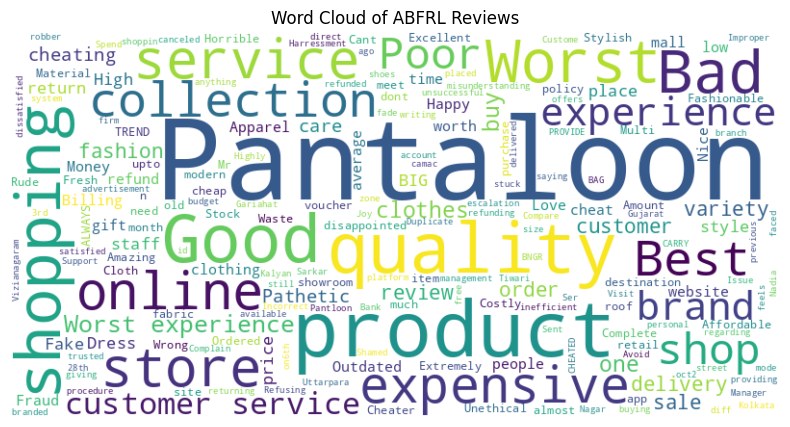

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Combine all reviews into a single string
text = ' '.join(review for review in df3['Review'])

# Optional: Remove stopwords
text = ' '.join(word for word in text.split() if word.lower() not in stop_words)
# Generate the word cloud
!pip install wordcloud

# Import libraries
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of ABFRL Reviews')
plt.show()


In [ ]:
positive_reviews = df3[df3['Sentiment'] > 0]
neutral_reviews = df3[df3['Sentiment'] == 0]
negative_reviews = df3[df3['Sentiment'] < 0]

# Combine reviews for each category into a single string
positive_text = ' '.join(review for review in positive_reviews['Review'])
neutral_text = ' '.join(review for review in neutral_reviews['Review'])
negative_text = ' '.join(review for review in negative_reviews['Review'])

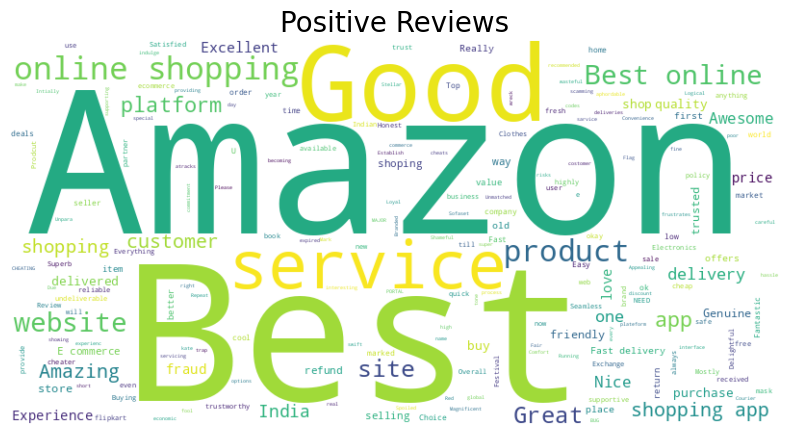

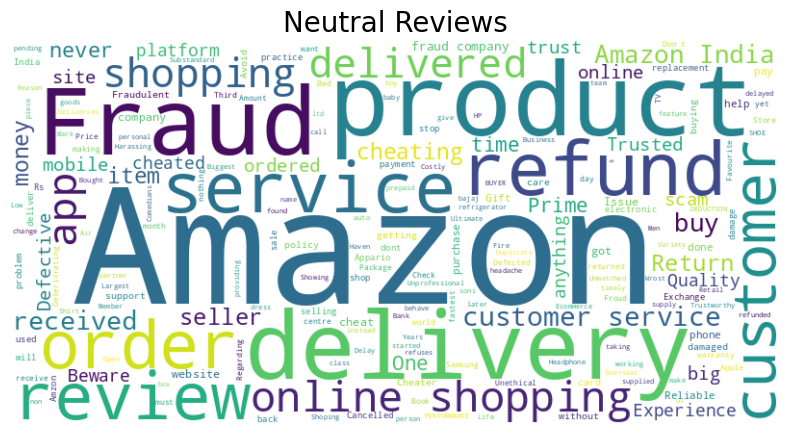

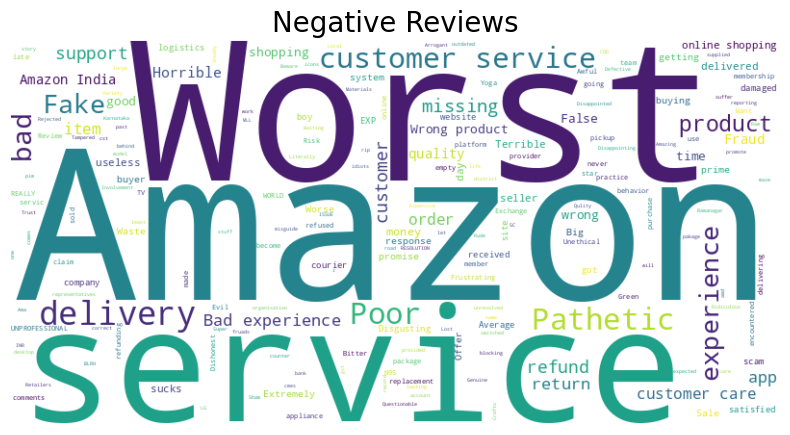

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create a word cloud
def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, size=20)
    plt.show()

# Generate word cloud for positive reviews
create_word_cloud(positive_text, 'Positive Reviews')

# Generate word cloud for neutral reviews
create_word_cloud(neutral_text, 'Neutral Reviews')

# Generate word cloud for negative reviews
create_word_cloud(negative_text, 'Negative Reviews')


In [ ]:
from selenium import webdriver
from webdriver_manager.chrome import ChromeDriverManager
from selenium.webdriver.chrome.service import Service
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.common.by import By
import time

# Set up Chrome options for headless mode
chrome_options = Options()
chrome_options.add_argument("--headless")
chrome_options.add_argument("--no-sandbox")
chrome_options.add_argument("--disable-dev-shm-usage")

# Install ChromeDriver and set up the service
service = Service(ChromeDriverManager().install())
driver = webdriver.Chrome(service=service, options=chrome_options)

# Navigate to the review page
url = 'https://www.mouthshut.com/product-reviews/amazon-reviews-925000493'  # Replace with the actual product review URL
driver.get(url)

# Allow time for the page to load
time.sleep(4)

# Initialize a list to store reviews
all_reviews = []

# Initialize a counter for pages
page_counter = 0
max_pages = 100

while True:
    # Extract review elements using the CSS selector
    review_elements = driver.find_elements(By.CSS_SELECTOR, 'strong a')
    reviews = [element.text for element in review_elements]
    all_reviews.extend(reviews)

    # Increment the page counter
    page_counter += 1
    if page_counter >= max_pages:
        print(f"Reached the maximum of {max_pages} pages.")
        break

    # Find and click the "Next" button to go to the next page
    try:
        next_button = driver.find_element(By.CSS_SELECTOR, 'li.next > a.btn.btn-link')
        driver.execute_script("arguments[0].click();", next_button)
        time.sleep(4)  # Allow time for the next page to load
    except:
        print("No more pages or an error occurred.")
        break

# Close the driver
driver.quit()

# Print the number of reviews collected
print(f"Number of reviews collected: {len(all_reviews)}")

# Optionally, print the first few reviews
print(all_reviews[:5])


No more pages or an error occurred.
Number of reviews collected: 1480
['Good products and always discount codes', 'Pathetic service by amazon', 'Amazon', 'Amazon : Convenient Shopping Experience', 'Defective Camera delivered by Amazon.']


In [ ]:
from textblob import TextBlob
import pandas as pd

# Create a DataFrame to store reviews and sentiment scores
df = pd.DataFrame(all_reviews, columns=['Review'])

# Function to analyze sentiment
def analyze_sentiment(all_reviews):
    analysis = TextBlob(all_reviews)
    return analysis.sentiment.polarity

# Apply sentiment analysis
df['Sentiment'] = df['Review'].apply(analyze_sentiment)

# Display the DataFrame
print(df.head(20))


                                             Review  Sentiment
0           Good products and always discount codes       0.70
1                        Pathetic service by amazon      -1.00
2                                            Amazon       0.00
3           Amazon : Convenient Shopping Experience       0.00
4             Defective Camera delivered by Amazon.       0.00
5                   Amazon replacement not received       0.00
6   Don't buy Amazon gift cards from a third-party.       0.00
7                      Amazon Delivery not received       0.00
8                 Fraud by amazon delivery personal       0.00
9                Genuine products, on time delivery       0.40
10                     A Logical Way To Shop Online       0.25
11          Poor service not delivering the promise      -0.40
12                                            Fraud       0.00
13                           Amazon with All are in       0.00
14     Amazon is amazing in providing poor services    

In [ ]:
df.to_excel('sentiment_analysis_amazon.xlsx', index=False)
from google.colab import files
files.download('sentiment_analysis_amazon.xlsx')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


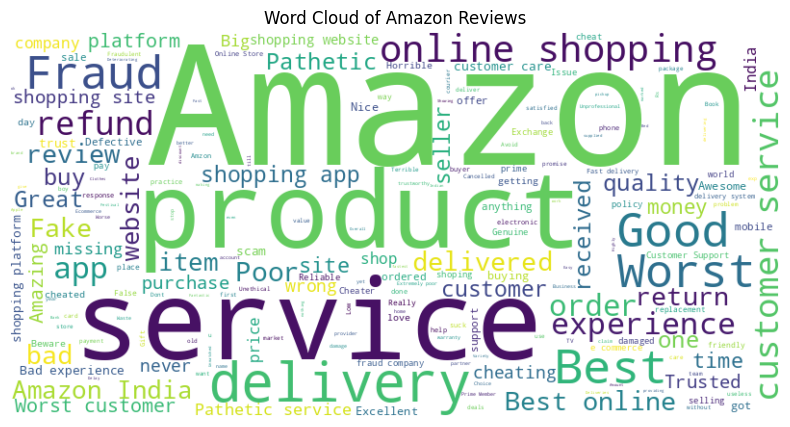

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords

# Download stopwords if not already downloaded
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Combine all reviews into a single string
text = ' '.join(review for review in df['Review'])

# Optional: Remove stopwords
text = ' '.join(word for word in text.split() if word.lower() not in stop_words)
# Generate the word cloud
!pip install wordcloud

# Import libraries
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Amazon Reviews')
plt.show()


In [ ]:
positive_reviews = df[df['Sentiment'] > 0]
neutral_reviews = df[df['Sentiment'] == 0]
negative_reviews = df[df['Sentiment'] < 0]

# Combine reviews for each category into a single string
positive_text = ' '.join(review for review in positive_reviews['Review'])
neutral_text = ' '.join(review for review in neutral_reviews['Review'])
negative_text = ' '.join(review for review in negative_reviews['Review'])

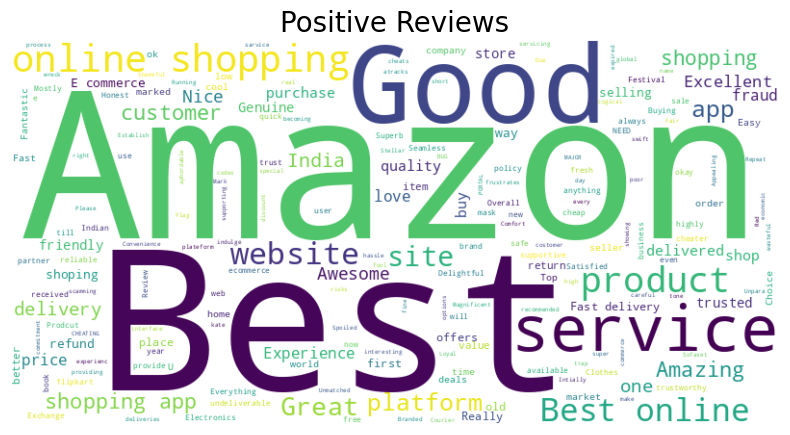

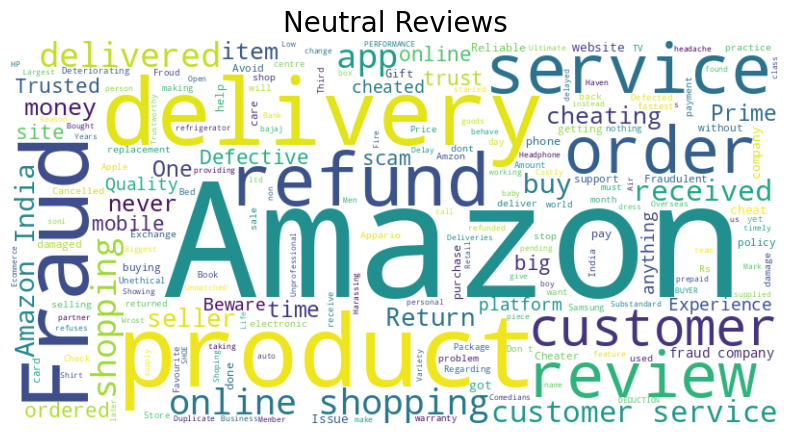

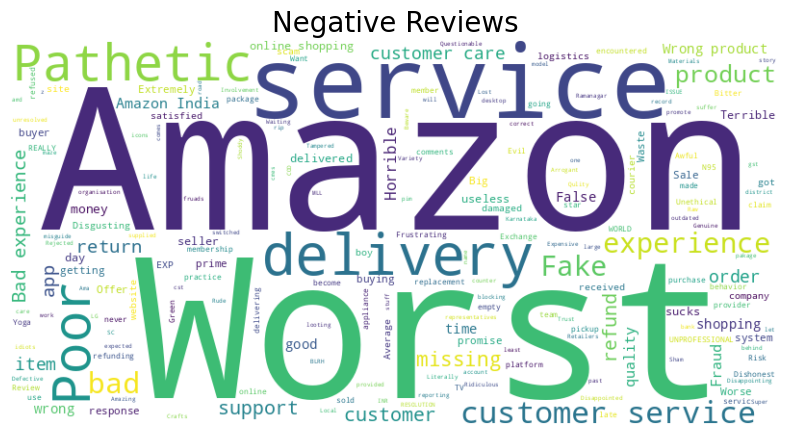

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to create a word cloud
def create_word_cloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, size=20)
    plt.show()

# Generate word cloud for positive reviews
create_word_cloud(positive_text, 'Positive Reviews')

# Generate word cloud for neutral reviews
create_word_cloud(neutral_text, 'Neutral Reviews')

# Generate word cloud for negative reviews
create_word_cloud(negative_text, 'Negative Reviews')
